# Coffee Chain Sales Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime
import calendar 
%matplotlib inline

## Data Loading & Processing

In [2]:
# Load the data
df = pd.read_csv('/Users/bhumi/Documents/DataScience/Projects/Coffee _Chain/Coffee_Chain_Sales.csv')
df.head()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular


## Column Categories

### 1. Identificatin Columns
        Area Code
        Date
        State
### 2. Sales and Revenue Metrics
        Cogs
        Profit
        Sales
        Inventory Margin
        Margin
### 3. Target Metrics
        Target_cogs
        Target_profit
        Target_sales
        Target_margin
### 4. Marketing and Product Information
        Market_size
        Market
        Marketing
        Product_line
        Product_type
        Product
### 5. Expense and Cost Metrics
        Total_expense
        DifferenceBetweenActualandTargetProfit
### 6. Type Information
        Type

In [28]:
df.shape

(1062, 22)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area Code                               1062 non-null   int64 
 1   Cogs                                    1062 non-null   int64 
 2   DifferenceBetweenActualandTargetProfit  1062 non-null   int64 
 3   Date                                    1062 non-null   object
 4   Inventory Margin                        1062 non-null   int64 
 5   Margin                                  1062 non-null   int64 
 6   Market_size                             1062 non-null   object
 7   Market                                  1062 non-null   object
 8   Marketing                               1062 non-null   int64 
 9   Product_line                            1062 non-null   object
 10  Product_type                            1062 non-null   object
 11  Prod

In [30]:
df.describe()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Year
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,587.030132,82.399247,0.387006,815.175141,102.423729,30.433145,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158,2013.706215
std,225.299162,64.824295,44.331180,916.156386,91.286704,25.963448,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526,0.912960
min,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000,2012.000000
25%,425.000000,41.000000,-15.000000,447.000000,51.000000,13.000000,16.250000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000,2013.000000
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000,2014.000000
75%,774.000000,101.000000,13.000000,968.000000,130.000000,40.750000,87.000000,227.000000,90.000000,120.000000,80.000000,210.000000,66.000000,2014.000000
max,985.000000,294.000000,249.000000,8252.000000,526.000000,122.000000,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000,2015.000000


In [31]:
# Check for null values
df.isna().sum()

Area Code                                 0
Cogs                                      0
DifferenceBetweenActualandTargetProfit    0
Date                                      0
Inventory Margin                          0
Margin                                    0
Market_size                               0
Market                                    0
Marketing                                 0
Product_line                              0
Product_type                              0
Product                                   0
Profit                                    0
Sales                                     0
State                                     0
Target_cogs                               0
Target_margin                             0
Target_profit                             0
Target_sales                              0
Total_expenses                            0
Type                                      0
Year                                      0
dtype: int64

In [21]:
# Check for duplicate values
df.duplicated().sum()

0

## SALES PERFORMANCE ANALYSIS

### Total sales 

In [32]:
total_sales = df['Sales'].sum()
total_sales

202895

In [33]:
print(df[['Sales']].describe().T)

        count        mean         std   min   25%    50%    75%    max
Sales  1062.0  191.049906  148.270317  21.0  98.0  133.0  227.0  815.0


In [28]:
#pip install plot_utils
#from plot_utils import distribution_plots, heatmap_plots, horizontal_bar_plots, monthly_averages_plots

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Sales distribution
#distribution_plots(df['Sales'], 'Sales Distribution', 'Sales', 'Frequency', bins=25)

NameError: name 'distribution_plots' is not defined

### Sales by state

In [34]:
sales_by_state = df.copy()
sales_by_state = sales_by_state.groupby(['State'])['Sales'].sum().reset_index()
sales_by_state

,State,Sales
0,California,23032
1,Colorado,12112
2,Connecticut,6670
3,Florida,8825
4,Illinois,16812
5,Iowa,13359
6,Louisiana,6193
7,Massachusetts,7339
8,Missouri,6072
9,Nevada,14822


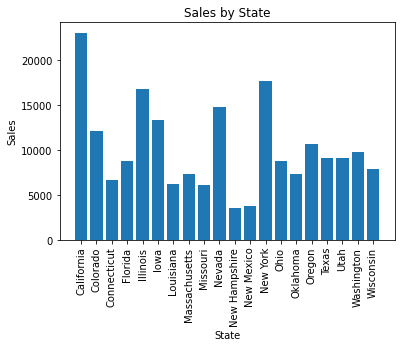

In [35]:
# Barplot of sales by state
plt.bar(sales_by_state['State'], sales_by_state['Sales'])
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Sales by State')
plt.xticks(rotation='vertical')
plt.show()


### Highest sales by year

In [36]:
df['Year'] = df['Date'].apply(lambda x : x.split('/')[2])

In [37]:
df['Year'] = pd.to_numeric(df['Year'])

In [38]:
highst_sales_by_year = df[['Year', 'Sales']].groupby('Year').sum().reset_index()
highst_sales_by_year

,Year,Sales
0,2012,10861
1,2013,38898
2,2014,84982
3,2015,68154


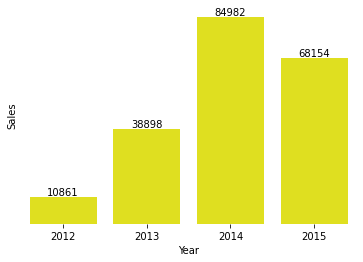

In [39]:
# barplot
ax = sns.barplot(data= highst_sales_by_year, x='Year' , y='Sales', color='Yellow')
sns.despine(left=True, bottom=True)
plt.yticks([],[])
ax.bar_label(ax.containers[0]);

### Sales per market

In [40]:
sales_per_market = df.copy()
sales_per_market = sales_per_market.groupby(['Market'])['Sales'].sum().reset_index()
sales_per_market

,Market,Sales
0,Central,64981
1,East,44108
2,South,26388
3,West,67418


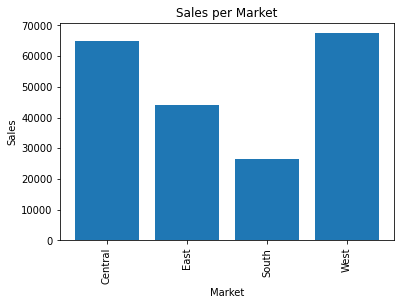

In [41]:
# barplot
plt.bar(sales_per_market['Market'], sales_per_market['Sales'])
plt.xlabel('Market')
plt.ylabel('Sales')
plt.title('Sales per Market')
plt.xticks(rotation='vertical')
plt.show()

## Sales variation by product line

In [42]:
product_line_sales = df.copy()
product_line_sales = product_line_sales.groupby(['Product_line'])['Sales'].sum().reset_index()
product_line_sales

,Product_line,Sales
0,Beans,108386
1,Leaves,94509


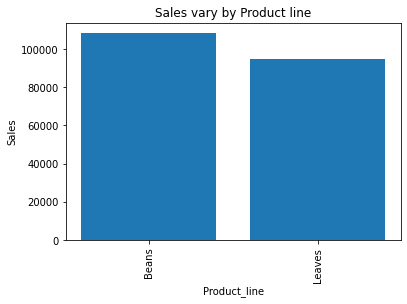

In [43]:
# barplot
plt.bar(product_line_sales['Product_line'], product_line_sales['Sales'])
plt.xlabel('Product_line')
plt.ylabel('Sales')
plt.title('Sales vary by Product line')
plt.xticks(rotation='vertical')
plt.show()

## PROFIT ANALYSIS

### Total profit

In [16]:
total_profit = df['Profit'].sum()
total_profit

64311

### Profit by year

In [44]:
prof_by_year = df[['State','Profit','Year']].groupby(['State', 'Year']).sum().reset_index()
prof_by_year

,State,Year,Profit
0,California,2012,192
1,California,2013,596
2,California,2014,264
3,California,2015,6288
4,Colorado,2012,147
...,...,...,...
64,Washington,2015,1660
65,Wisconsin,2012,153
66,Wisconsin,2013,520
67,Wisconsin,2014,810


### Profit by State

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df['State'], df['Profit'], color='b')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profits by State')
plt.xticks(rotation=45);

### Profit compare to the target profit for each state

In [ ]:
prof_to_target_prof = pd.DataFrame()
prof_to_target_prof['State'] = df['State']
prof_to_target_prof['Profit'] = df['Profit']
prof_to_target_prof['Target_profit'] = df['Target_profit']
prof_to_target_prof

In [ ]:
groupby_profit = prof_to_target_prof.groupby(['State'])[['Profit', 'Target_profit']].sum().reset_index()
groupby_profit

## Which product has the highest Profit?

In [11]:
prod_highst_prof = df[['Product', 'Profit']].groupby('Product').sum().reset_index().sort_values(by='Profit')
prod_highst_prof


,Product,Profit
9,Green Tea,89
11,Mint,1286
0,Amaretto,1352
1,Caffe Latte,2716
7,Decaf Irish Cream,3201
12,Regular Espresso,3438
2,Caffe Mocha,4687
8,Earl Grey,5975
5,Darjeeling,6976
3,Chamomile,7006


In [ ]:
#pip install --upgrade matplotlib
#import matplotlib.pyplot as plt

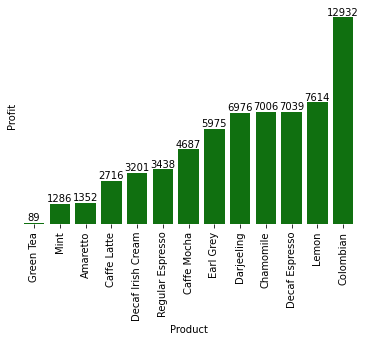

In [12]:
# barplot
ax = sns.barplot(data= prod_highst_prof, x='Product', y='Profit', color='Green')
sns.despine(left=True, bottom=True)
plt.xticks(rotation='vertical')
plt.yticks([],[])
ax.bar_label(ax.containers[0]);


## COGS (Cost of Goods Sold) Analysis

### Total COGS for the dataset

In [22]:
total_COGS = df['Cogs'].sum()
total_COGS

87508

### COGS compare to the target COGS per state

In [23]:
COGS_to_target_cogs = pd.DataFrame()
COGS_to_target_cogs['Cogs'] = df['Cogs']
COGS_to_target_cogs['Target_cogs'] = df['Target_cogs']
COGS_to_target_cogs['State'] = df['State']
COGS_to_target_cogs = COGS_to_target_cogs.groupby(['State'])[['Cogs', 'Target_cogs']].sum().reset_index()
COGS_to_target_cogs

,State,Cogs,Target_cogs
0,California,10748,10360
1,Colorado,5086,4520
2,Connecticut,2716,2140
3,Florida,3606,2900
4,Illinois,7000,7400
5,Iowa,5658,4540
6,Louisiana,2504,2080
7,Massachusetts,2384,2020
8,Missouri,2722,2260
9,Nevada,7674,5580


### COGS vs Traget COGS by Year

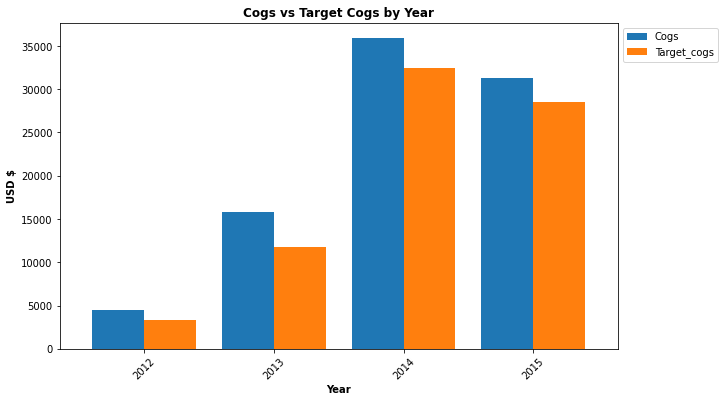

Cogs vs Target Cogs by Year:
        Cogs  Target_cogs
Year                    
2012   4481         3310
2013  15827        11820
2014  35902        32420
2015  31298        28570


In [25]:
grouped = df.groupby('Year')[['Cogs', 'Target_cogs']].sum()

# Create a bar plot
ax = grouped.plot(kind='bar', figsize=(10, 6), width=0.8,)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('USD $', fontweight='bold')
plt.title('Cogs vs Target Cogs by Year', fontweight='bold')
plt.xticks(rotation=45)

plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print("Cogs vs Target Cogs by Year:\n",grouped)

### COGS by Year

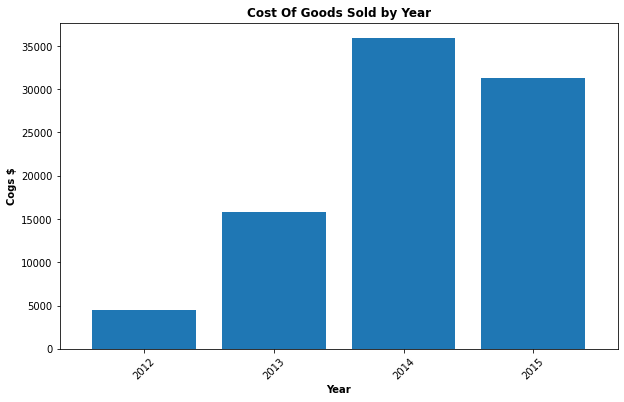

Cost Of Goods Sold by Year:
 Year
2012     4481
2013    15827
2014    35902
2015    31298
Name: Cogs, dtype: int64


In [24]:
grouped = df.groupby(['Year'])['Cogs'].sum()

# Create a bar plot
ax = grouped.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Cogs $', fontweight='bold')
plt.title('Cost Of Goods Sold by Year', fontweight='bold')
plt.xticks(rotation=45)

plt.show()

print("Cost Of Goods Sold by Year:\n",grouped)

## KEY PERFORMANCE METRICS

### Marketing vs Profit per Year

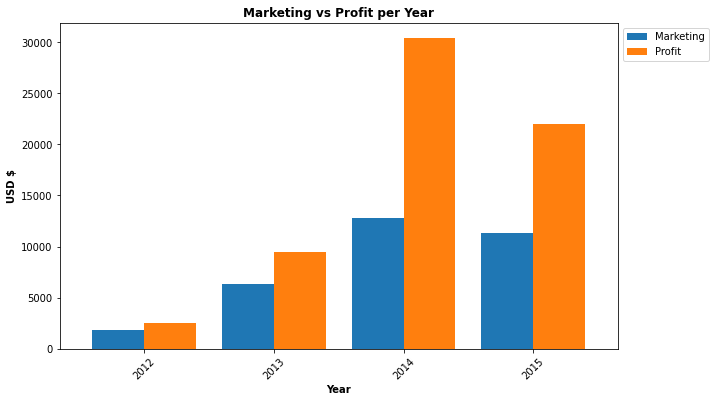

Marketing vs Profit per Year:
       Marketing  Profit
Year                   
2012       1866    2493
2013       6299    9484
2014      12790   30380
2015      11365   21954


In [22]:
grouped = df.groupby('Year')[['Marketing', 'Profit']].sum()

# create a bar chart
ax = grouped.plot(kind = 'bar', figsize=(10,6), width=0.8,)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('USD $', fontweight='bold')
plt.title('Marketing vs Profit per Year', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print("Marketing vs Profit per Year:\n",grouped)

In [23]:
# Calculate ROI for each year
grouped['ROI'] = (grouped['Profit'] / grouped['Marketing']) * 100

# For readbility lets format our results
grouped['ROI'] = grouped['ROI'].apply(lambda x: f'{x:.2f}%')

print("ROI for each year:\n", grouped[['ROI']])

ROI for each year:
           ROI
Year         
2012  133.60%
2013  150.56%
2014  237.53%
2015  193.17%
